# shortest_path

Solve shortest path from origin node(s) to destination node(s).

See also k_shortest_paths to solve multiple shortest paths between a single origin and destination. For additional functionality or different solver algorithms, use NetworkX directly.

In [1]:
# OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks
import osmnx as ox

ox.config(use_cache=True, log_console=False)
ox.__version__

'1.1.2'

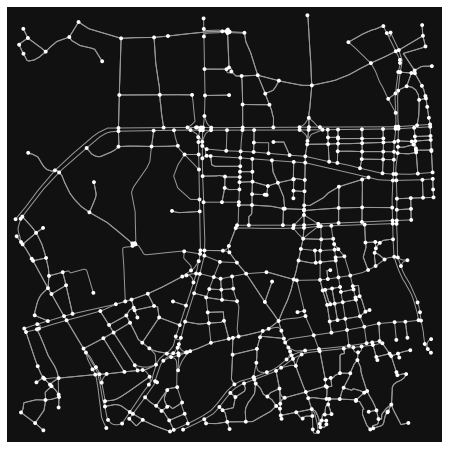

In [2]:
center_point = (37.5661, 126.9783) # (lat, lng) Seoul, South Korea
dist = 1000
dist_type = 'bbox' # "network", "bbox"
network_type = 'drive' # "all_private", "all", "bike", "drive", "drive_service", "walk"

# Create a graph from OSM within some distance of some (lat, lng) point.
G = ox.graph_from_point(
    center_point,
    dist=dist, 
    dist_type=dist_type,
    network_type=network_type)

# Plot a graph.
fig, ax = ox.plot_graph(G)

## length

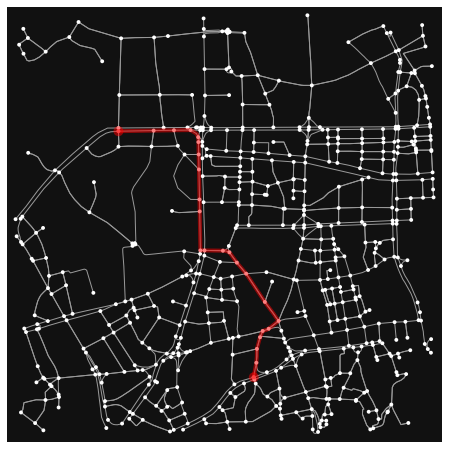

In [4]:
# Set origin and destination node ID
orig, dest = list(G)[0], list(G)[-1]

# Solve shortest path from origin node(s) to destination node(s).
route = ox.distance.shortest_path(G, orig, dest, weight='length', cpus=1)

# Plot a route along a graph.
fig, ax = ox.plot_graph_route(G, route)

## travel_time

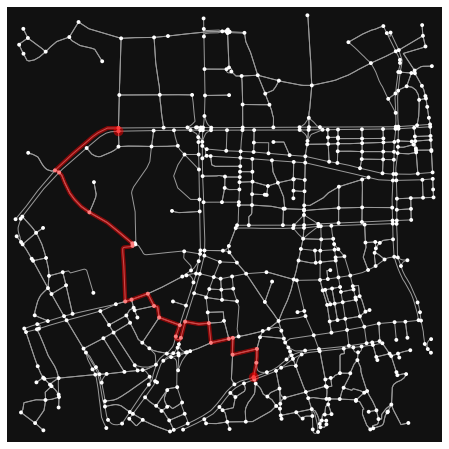

In [5]:
# Solve shortest path from origin node(s) to destination node(s).
route = ox.distance.shortest_path(G, orig, dest, weight='travel_time', cpus=1)

# Plot a route along a graph.
fig, ax = ox.plot_graph_route(G, route)

## length with travel_time

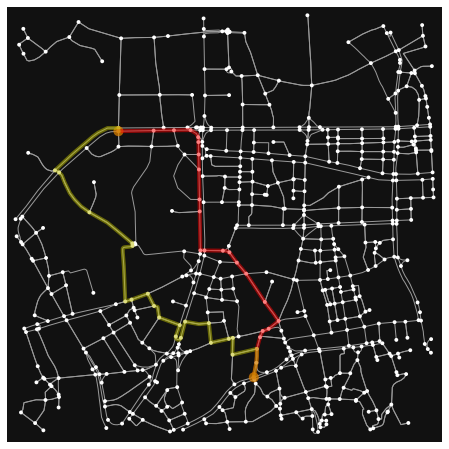

In [6]:
# Solve shortest path from origin node(s) to destination node(s).
path1 = ox.shortest_path(G, orig, dest, weight='length', cpus=1)
path2 = ox.shortest_path(G, orig, dest, weight='travel_time', cpus=1)

# routes as a list of lists of node IDs
route = [path1, path2]

# Plot several routes along a graph.
fig, ax = ox.plot_graph_routes(G, route, route_colors=['r', 'y'])